#Predicting the brain stroke using machine learning algorithms






**Background**

In the machine learning models the overall problem is solved in the field of brain stroke where it will try to predict the diseases and selecting the best model based on the following attributes.
The dataset is taken from the Kaggle link:  
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

**some attributes are:**

Attribute Information

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not


**Aim**

the aim of this project is to predict the stroke of patient negative or positive using the various classification models and selecting the best and analyze the train of data also..


Before starring the project i m going to import all the libraries necessary for building our model.

**libraries**

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import graphviz
import os
import pandas as pd
from sklearn import preprocessing
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud
!pip install pandas-profiling
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")

# after importing all the library lets load the daatset my dataset is in google drive i will mount my drive

In [97]:
# i have used google colab or anaconda can be used
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load Data and Data Exploratory**

In [98]:
# the dataframe is to read the csv file from drive
# df is used to load the data into a dataframe object df

df=pd.read_csv('drive/MyDrive/healthcare-dataset-stroke-data.csv')

In [99]:
df.drop("id", axis=1, inplace=True)
# Here Data is the column name to be dropped.
# inplace=True will automatically save the dataframe after dropping the Data column
# axis=1 implies to the column where as axis=0 implies to rows.

In [100]:
df.info
# summary of data

<bound method DataFrame.info of       gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type

In [101]:
#checking the proportion

df['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [102]:
  # represents the number of rows and columns
df.shape

(5110, 11)

**Data Analysis**

In [103]:
  # summary statistics of dataframe(df)
  df.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.226614      0.097456       0.054012         106.147677   
std      22.612647      0.296607       0.226063          45.283560   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.245000   
50%      45.000000      0.000000       0.000000          91.885000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4909.000000  5110.000000  
mean     28.893237     0.048728  
std       7.854067     0.215320  
min      10.300000     0.000000  
25%      23.500000     0.000000  
50%      28.100000     0.000000  
75%      33.100000     0.000000  
max      97.600000     1.000000

In [104]:
  # shows first five data
  df.head()


gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1

**Finding number of Null values in each Column**

In [105]:
# finding the null values
df.isnull().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<Axes: >

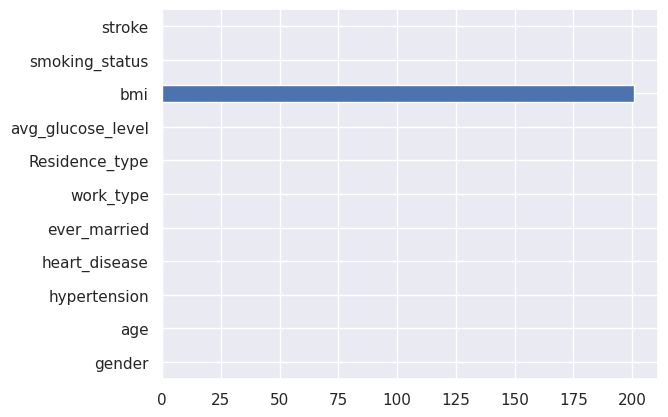

In [106]:
# plotting the null (na) values in graphical representation
df.isna().sum().plot.barh()

In [107]:
# dropna function will modify the dataframe directly. means if you set the inplace= true directly the dropna will drop all the missing value  remve all the nul values

df.dropna(inplace=True)

In [108]:

# provides all the data types of all attributes and count the number of null values

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [109]:
# provides all the unique values of stroke attributes

df.stroke.unique()

array([1, 0])

In [110]:
df.isnull().sum()   # to displau the sum of null values

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [111]:
# shows the unique values of heart diseases attributes

df.heart_disease.unique()

array([1, 0])

In [112]:
# read the df column as having an 'object' data type,
#prints the number of unique values, and lists those unique values.


for i in df.columns:
  if(df[i].dtypes=='O'):
    print(f'Number of unique Values in {i} is {len(df[i].unique())}')
    print(df[i].unique())

Number of unique Values in gender is 3
['Male' 'Female' 'Other']
Number of unique Values in ever_married is 2
['Yes' 'No']
Number of unique Values in work_type is 5
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Number of unique Values in Residence_type is 2
['Urban' 'Rural']
Number of unique Values in smoking_status is 4
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [113]:
# list the unique values in df columns using loop


print(df[i].unique())


[1 0]


In [114]:
# to see the unique value of stroke


df['stroke']=df[['stroke']].astype(float)

In [115]:
df['stroke'].unique()

array([1., 0.])

In [116]:
df['stroke'].sum()/len(df)*100

4.257486249745366

**Data visualisation**

is the process of creating graphical representation to understand and interpret patterns, trends

**converting categorical to numerical data**

We can see that class feature is categorical value and since this is the value which needs to be needs to be predicted we need to convert it to numerical data. We can do it by using label encoding

* **Categorical Variables:** 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'

* **Numerical Variables:** 'id', 'hypertension', 'heart_disease', 'stroke'

In [117]:
#categorical value

def bar_plot(variable):
    # get feature
    var = df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()

    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

In [118]:
categorical = (df.dtypes == "object")
categorical_list = list(categorical[categorical].index)

print("Categorical variables:")
print(categorical_list)

Categorical variables:
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


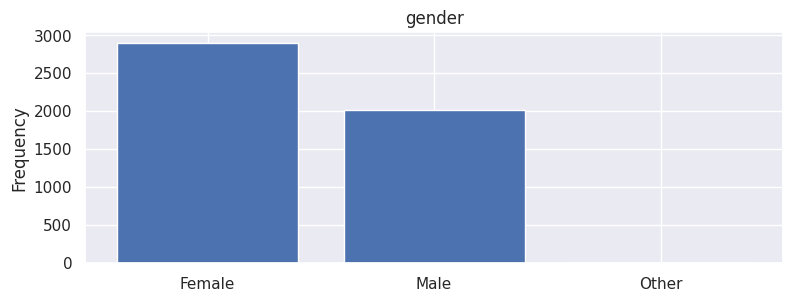

gender:
Female    2897
Male      2011
Other        1
Name: gender, dtype: int64


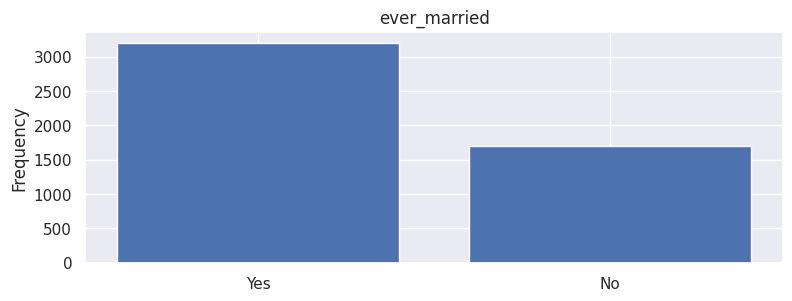

ever_married:
Yes    3204
No     1705
Name: ever_married, dtype: int64


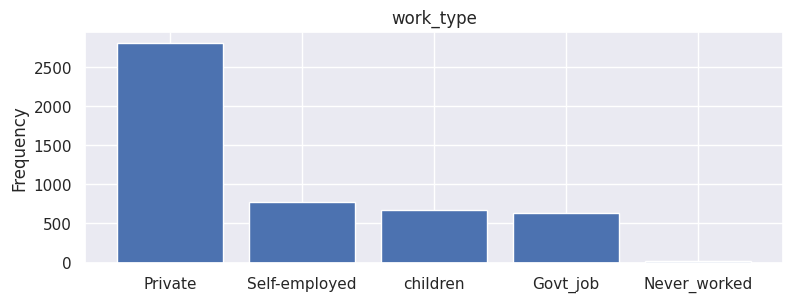

work_type:
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64


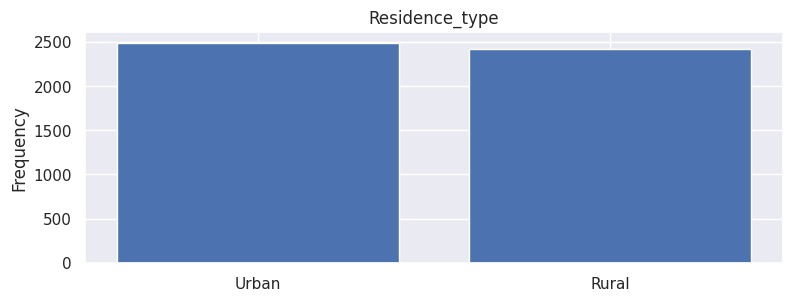

Residence_type:
Urban    2490
Rural    2419
Name: Residence_type, dtype: int64


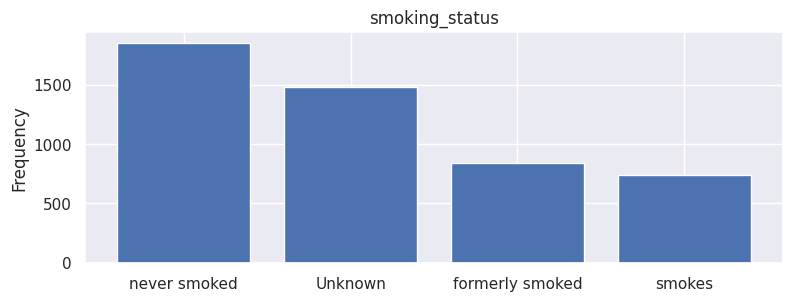

smoking_status:
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64


In [119]:
sns.set_style('darkgrid')
categorical_variables = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for c in categorical_variables:
    bar_plot(c)

It represents all the categorical data analysis of attributes

# Violin plots**

bold text
 shows the basic statistics of the data, as well as its distribution. These plots are often used to compare the distribution of a given variable across some categories which are provided

<Axes: xlabel='ever_married', ylabel='stroke'>

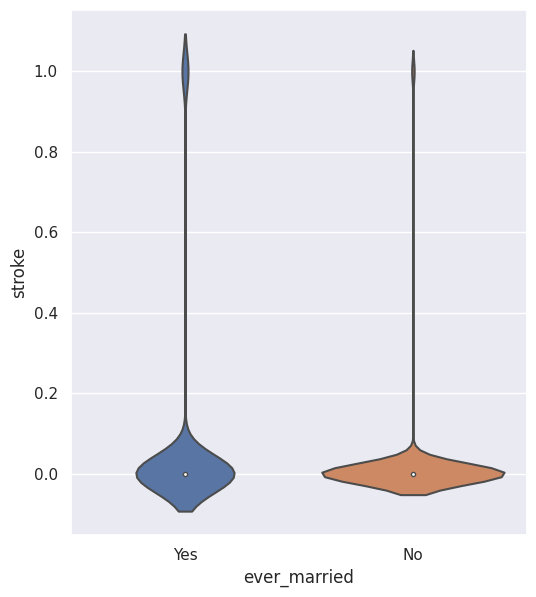

In [120]:
plt.figure(figsize=(20,15))
sns.set_theme(style="darkgrid")
plt.subplot(2,3,1)
sns.violinplot(x = 'ever_married', y = 'stroke', data = df)


**Numerical** values for data visualisation and predictions




In [121]:
#numerical values
numerical_int64 = (df.dtypes == "int64")
numerical_int64_list = list(numerical_int64[numerical_int64].index)

print("Categorical variables:")
print(numerical_int64_list)

Categorical variables:
['hypertension', 'heart_disease']


In [122]:
#to visualise the variable using histogram


def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

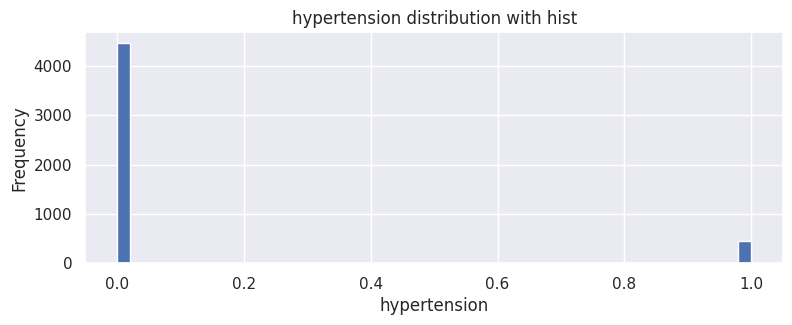

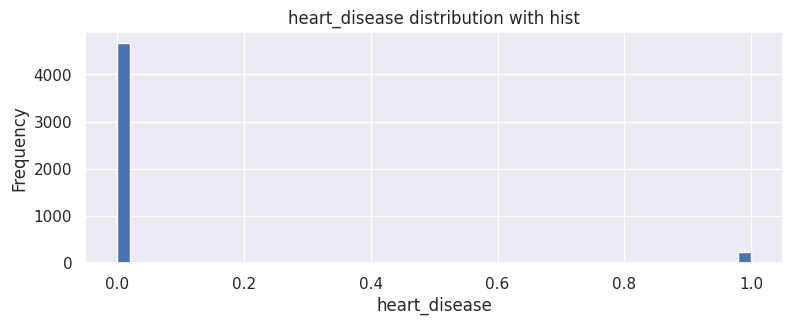

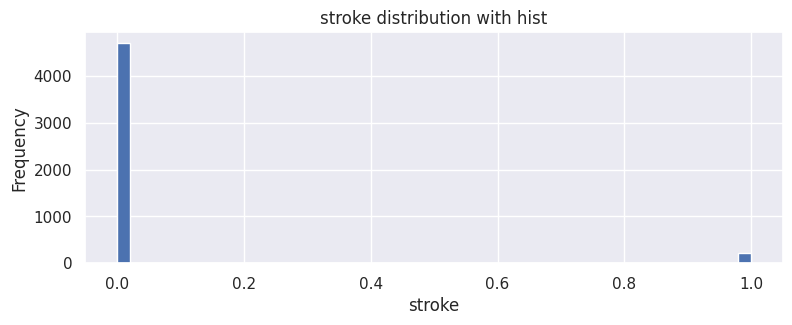

In [123]:
#plotting the rows

numerical_variables = ['hypertension', 'heart_disease', 'stroke']
for n in numerical_variables:
    plot_hist(n)



**__Observation:_ **
* Patients who does not have hypertension have stroke than those that does not have hypertension.


* Also, patients who does not have heart disease have stroke than those that does not have heart disease

In [124]:
# #Placing data in a visual context to expose patterns, trends and correlations

numerical_float64 = (df.dtypes == "float64")
numerical_float64_list = list(numerical_float64[numerical_float64].index)

print("Numerical variables:")
print(numerical_float64_list)

Numerical variables:
['age', 'avg_glucose_level', 'bmi', 'stroke']


In [125]:
# Using seaborn to visualize correlations using histograms.
#Using seaborn to visualize correlations using histograms.

def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribution with Histogram".format(variable))
    plt.show()

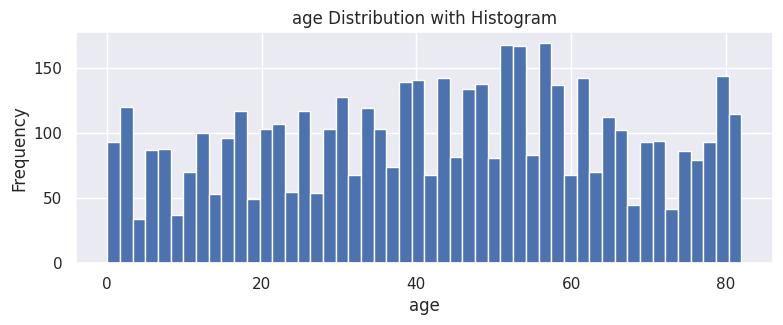

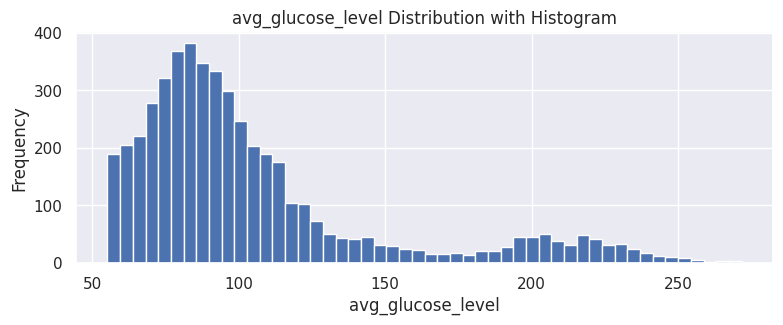

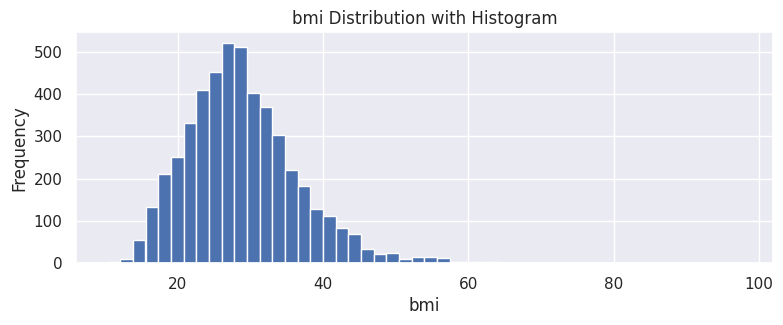

In [126]:
# displayng on histogram

numerical_variables = ['age', 'avg_glucose_level', 'bmi']
for n in numerical_variables:
    plot_hist(n)

**Observation**

  Most of the people have BMI under 60 years and people with average gulcose level higher than 150 similarly, it is predicted that stroke occurance is on  40 to 60 years.

Text(0.5, 1.0, 'avg_glucose_level Interval and Counts')

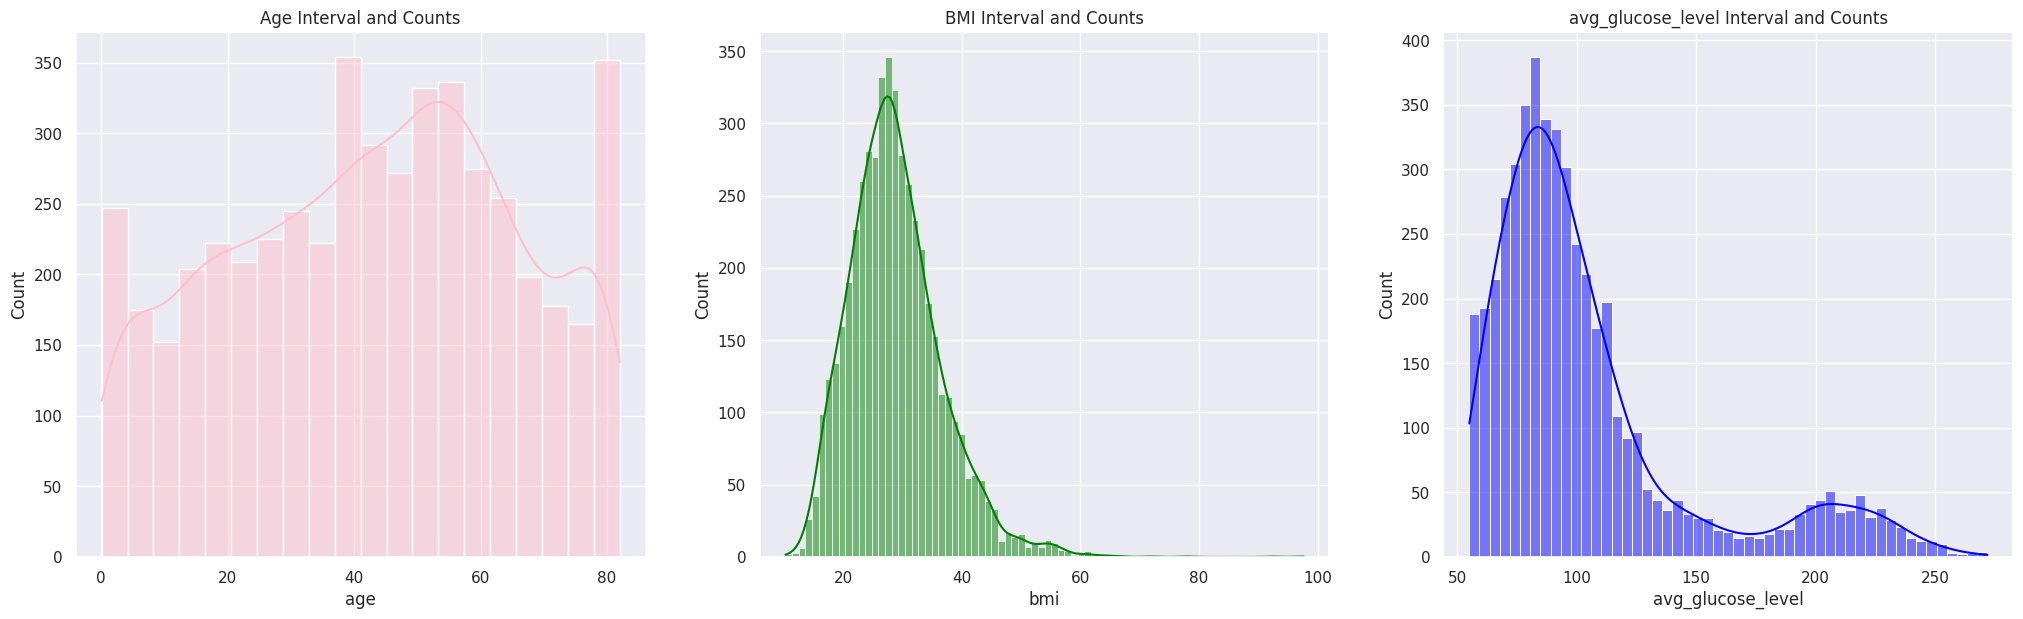

In [127]:
# creating 3 corelations on histogram

plt.figure(figsize=(25,15))

plt.subplot(2,3,1)
sns.histplot(df['age'], color = 'pink', kde = True).set_title('Age Interval and Counts')

plt.subplot(2,3,2)
sns.histplot(df['bmi'], color = 'green', kde = True).set_title('BMI Interval and Counts')

plt.subplot(2,3,3)
sns.histplot(df['avg_glucose_level'], kde = True, color = 'blue').set_title('avg_glucose_level Interval and Counts')

**Observations**

Patients with average glucose level higher than 150 and over 60 years old tends to have stroke.

Most people have BMI less than 60, stroke tends to happen with the ones that have average glucose level over 150.






Text(0.5, 1.0, 'Stroke Interval and Counts')

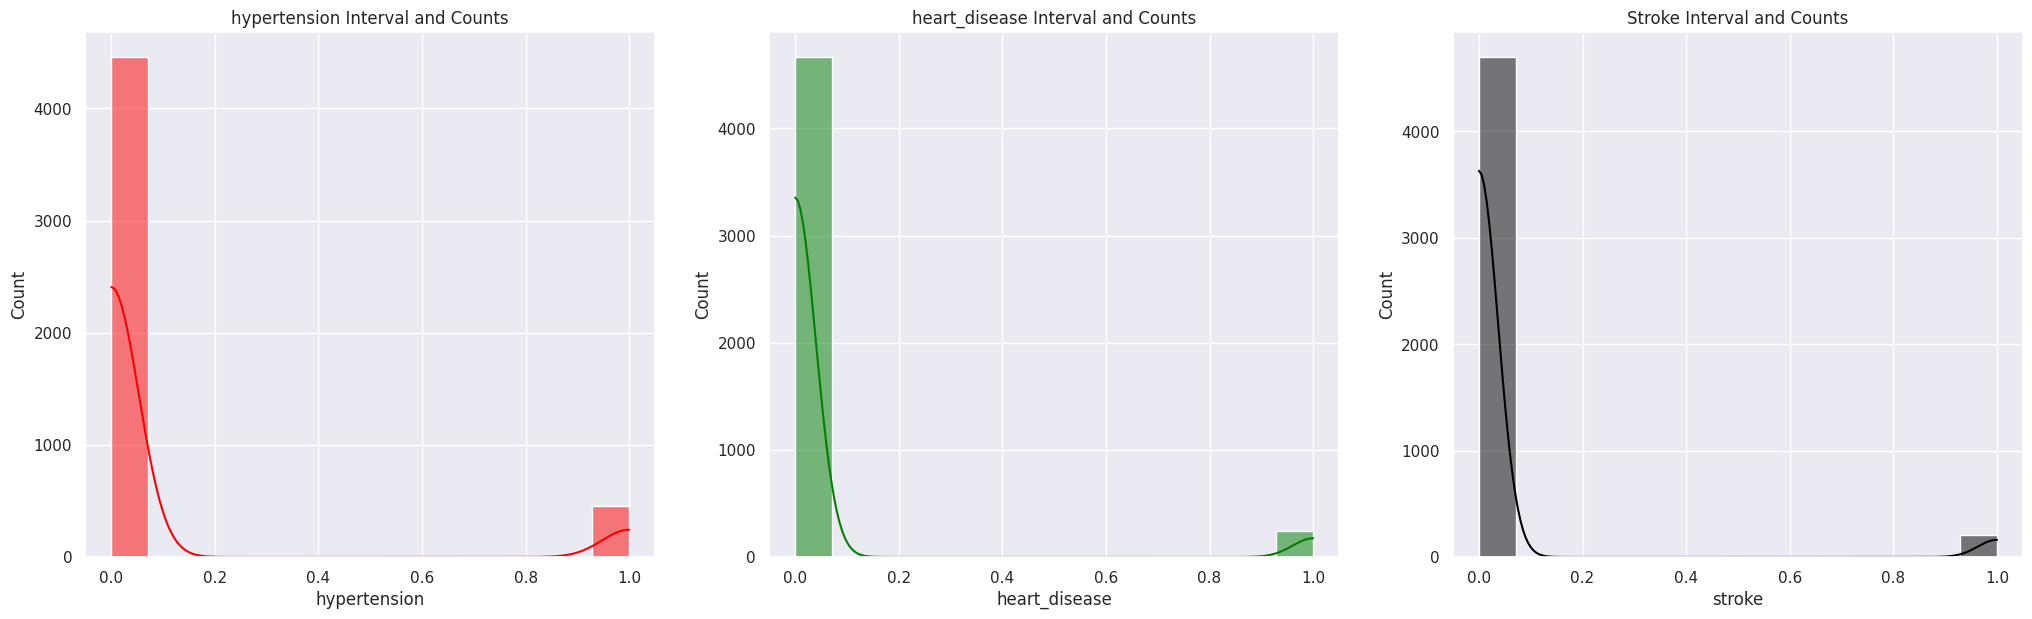

In [128]:
# determinig the hypertension vs heardiseses vs stroke


plt.figure(figsize=(25,15))

plt.subplot(2,3,1)
sns.histplot(df['hypertension'], color = 'red', kde = True).set_title('hypertension Interval and Counts')

plt.subplot(2,3,2)
sns.histplot(df['heart_disease'], color = 'green', kde = True).set_title('heart_disease Interval and Counts')

plt.subplot(2,3,3)
sns.histplot(df['stroke'], kde = True, color = 'black').set_title('Stroke Interval and Counts')

**Observation**
patient with 0.0 have the highest percentage of stroke and heart diseases of 0.2


<Axes: xlabel='stroke', ylabel='avg_glucose_level'>

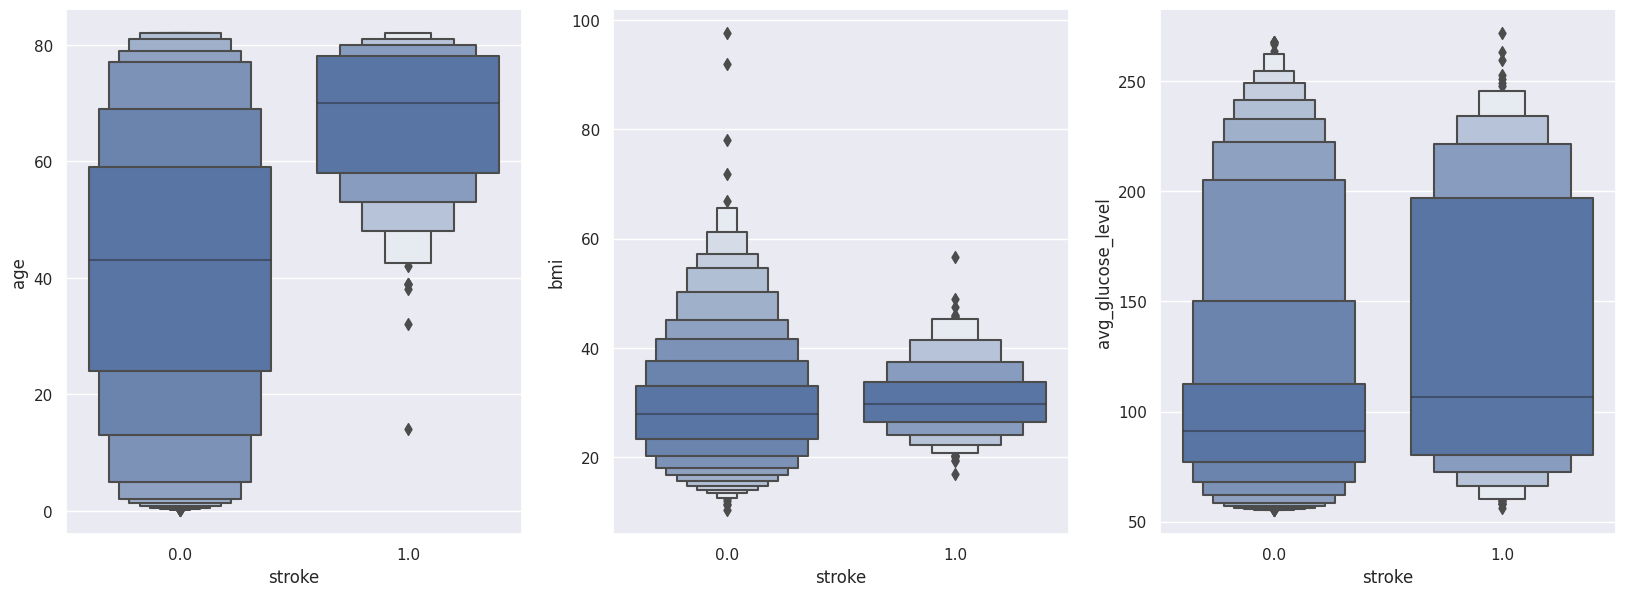

In [129]:
# importing seaborn for statistical plots and high level interface



import seaborn as sns
sns.set_theme(style="darkgrid")


plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.boxenplot(x=df['stroke'], y=df['age'],
              color="b",
              scale="linear", data=df)

plt.subplot(2,3,2)
sns.boxenplot(x=df['stroke'], y=df['bmi'],
              color="b",
              scale="linear", data=df)

plt.subplot(2,3,3)
sns.boxenplot(x=df['stroke'], y=df['avg_glucose_level'],
              color="b",
              scale="linear", data=df)

**observation**

BMI is the least correlated with stroke, and age is the most correlated to stroke amongs the numerical features.

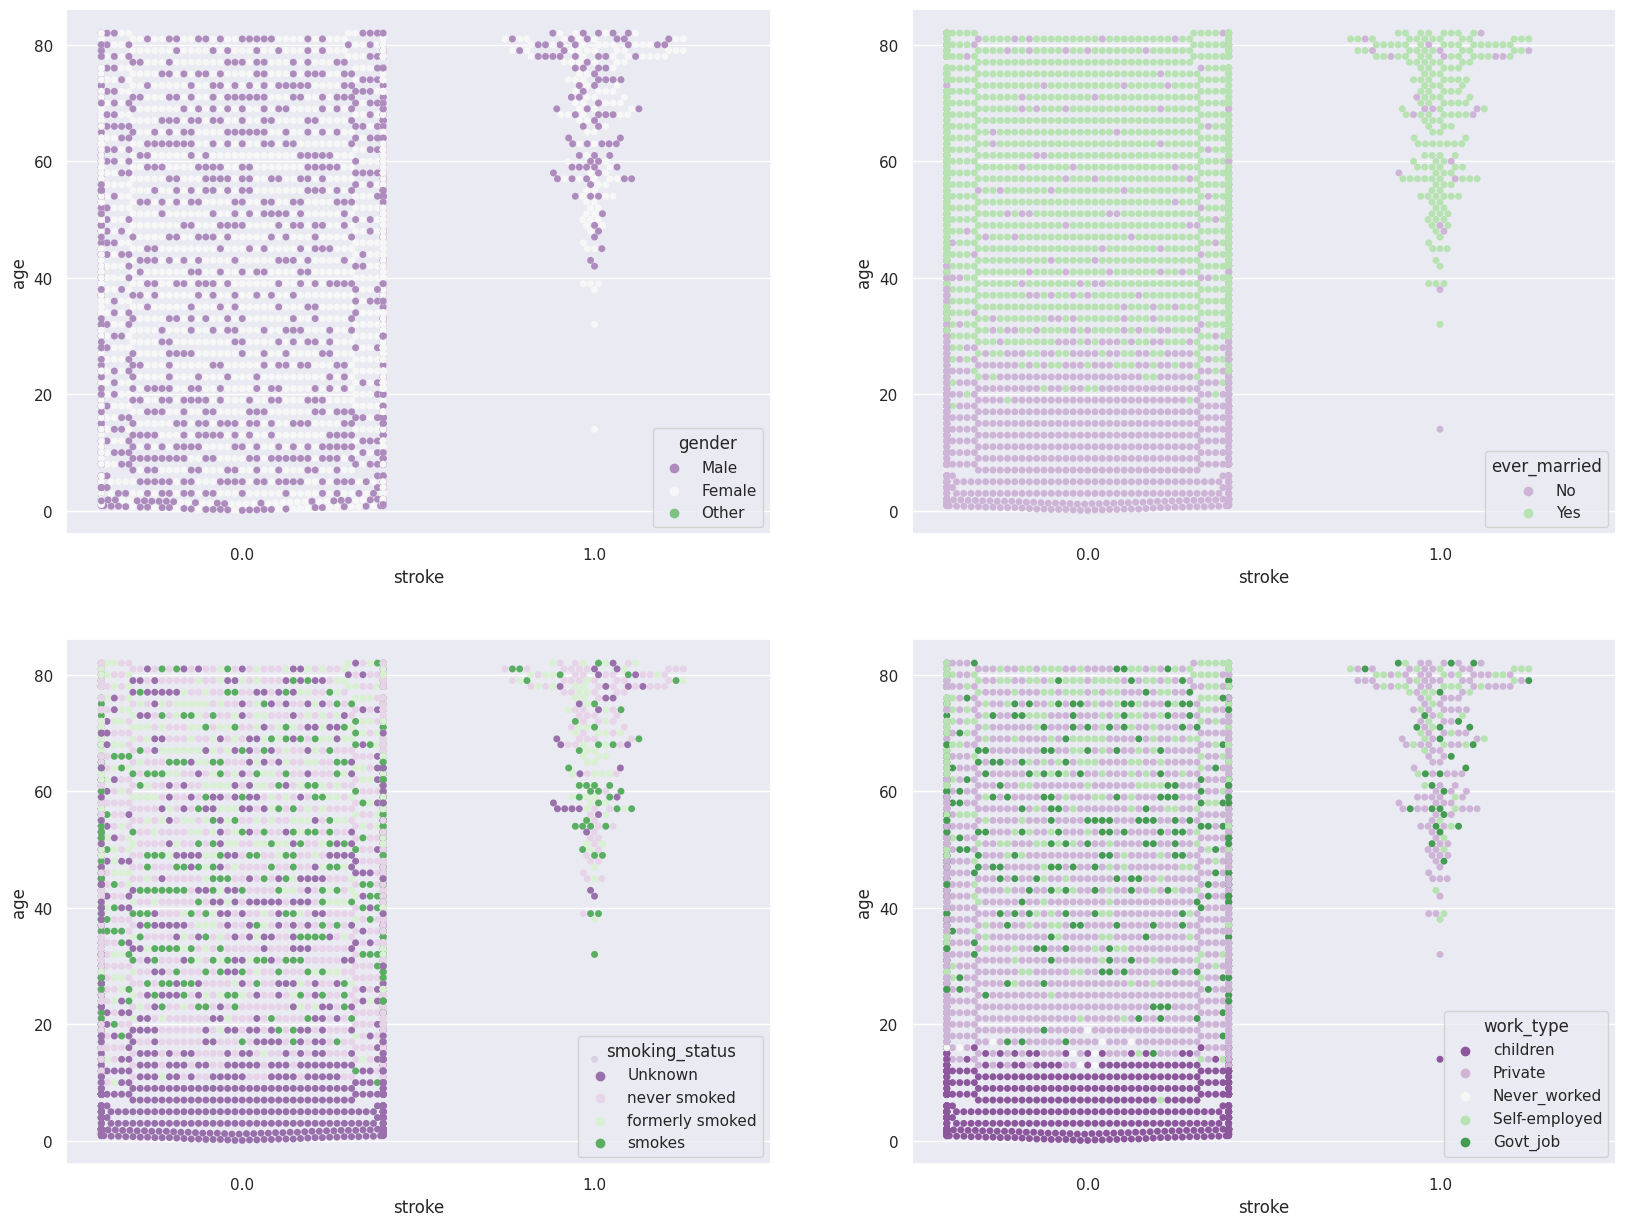

In [130]:
# importing sns and   generating the following fields and indicate the correlation of each field.


import seaborn as sns
sns.set_theme(style="darkgrid")

plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.swarmplot(x="stroke", y="age",hue="gender", data=df, palette="PRGn")

plt.subplot(2,2,2)
sns.swarmplot(x="stroke", y="age",hue="ever_married", data=df, palette="PRGn")

plt.subplot(2,2,3)
sns.swarmplot(x="stroke", y="age",hue="smoking_status", data=df, palette="PRGn")

plt.subplot(2,2,4)
sns.swarmplot(x="stroke", y="age",hue="work_type", data=df, palette="PRGn")

plt.show()

**observation**


Patients who are married at a point in their life have stroke than those that have never married.


More patients from the private sector has stroke, followed by the self employed, and govt workers respectively.

Combination of patients that formely smoked and those that smokes have stroke than those that never smoked.

We also have lots of unknown smoking status that has stroke




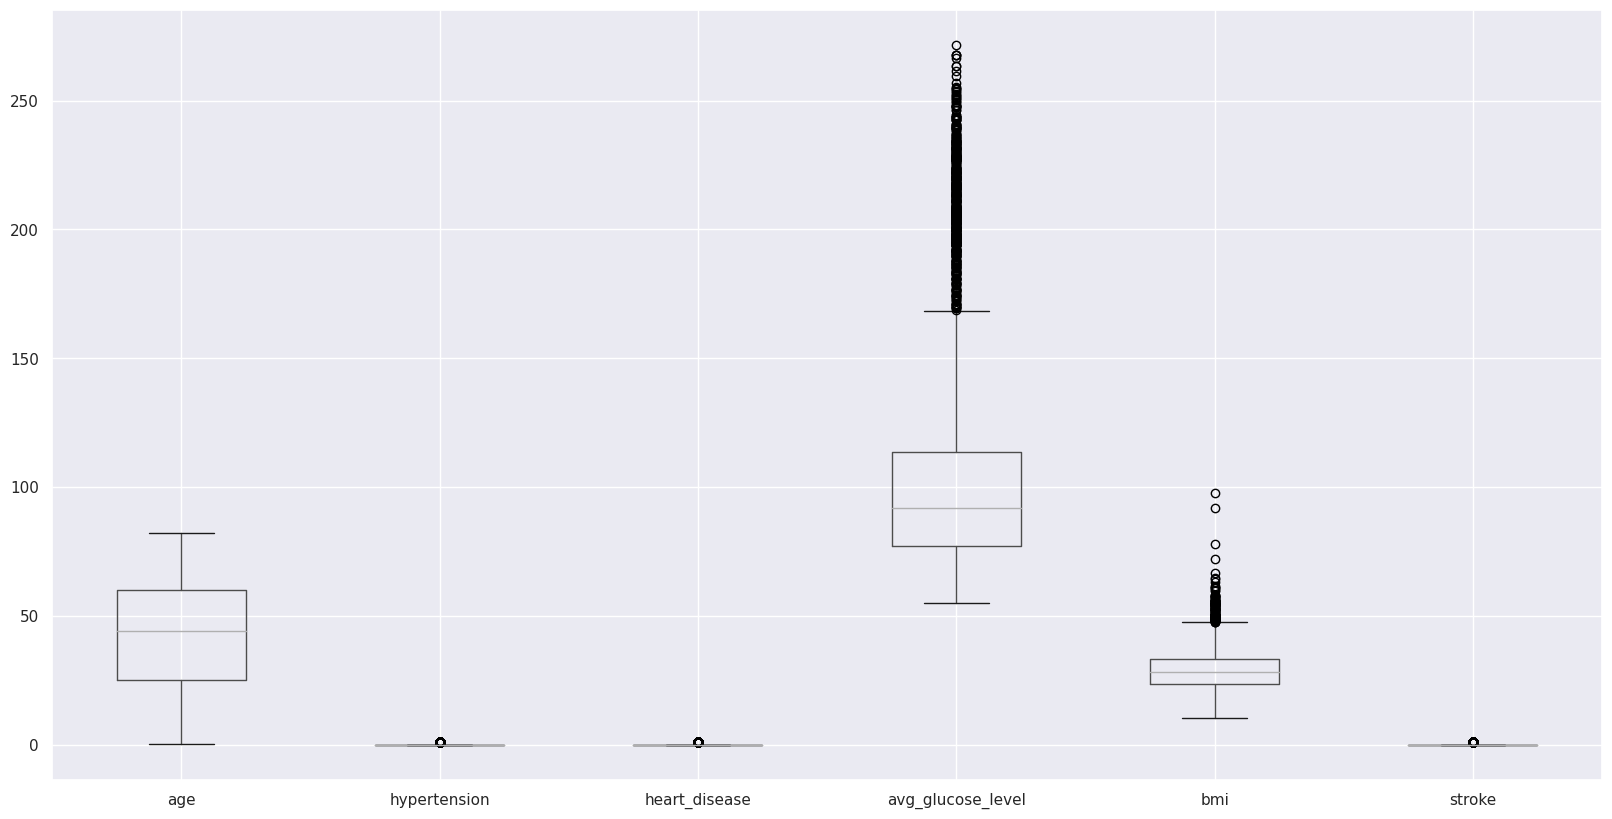

In [132]:
# importing metsplotlib
# using data visualisation tehniques

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
df.boxplot()
plt.show()

# observation

It seems that patients with average glucose level higher than tends to have stroke.


As we can see in the above plot, compared to individuals with normal glucose levels, those with high glucose levels or at risk of diabetes are more prone to experiencing strokes.

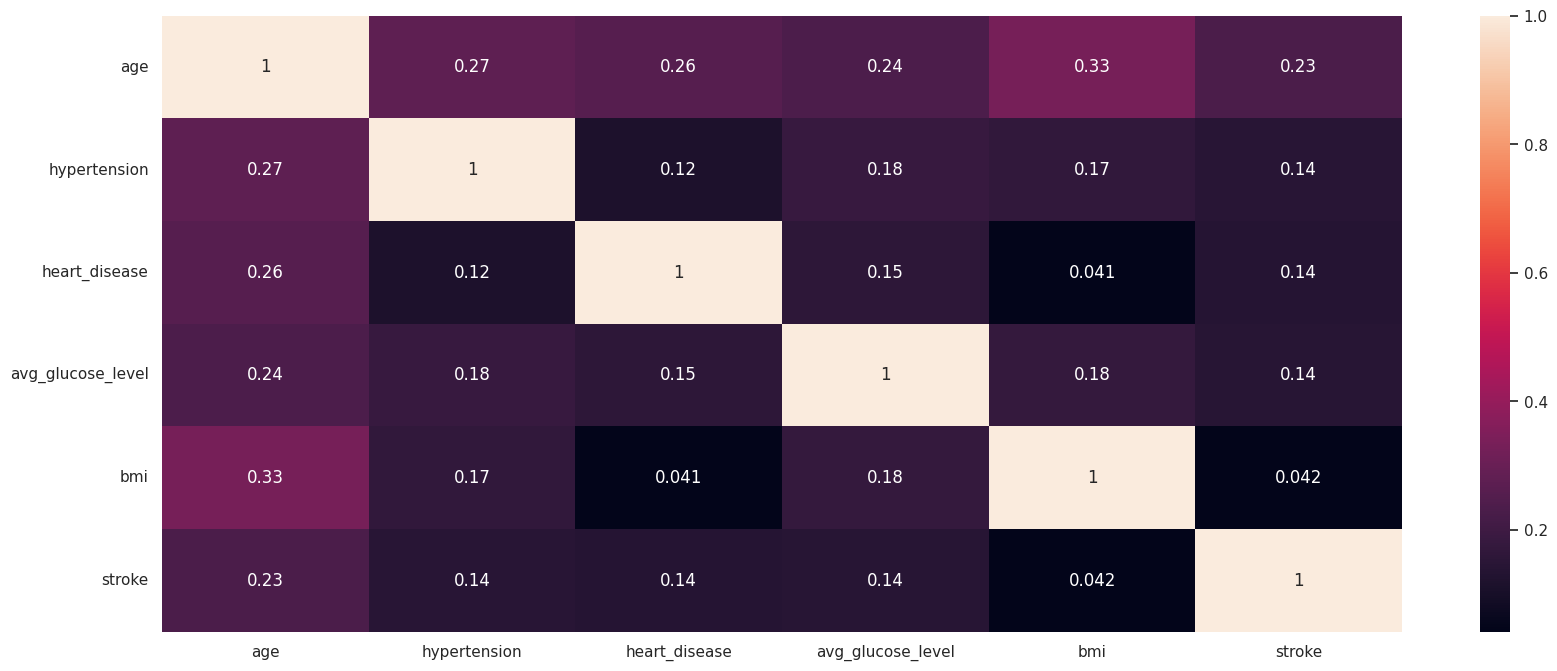

In [133]:
#importing the seaborn

 # it is used for making the statistical graphics data and used to understand and explore the data
import seaborn as sns
corr= df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr,annot=True)
plt.show()







**observation**


There is a weak correlation between the attributes as per the plotted heatmap
The highest correlation found was between age and bmi - 0.32

Rest all correlations were less than 0.33

BMI is the least correlated with stroke, and age is the most correlated to stroke amongs the numerical features


#now lets analyze the various catogory**

In [134]:
# Gender- stroke

df[["gender","stroke"]].groupby(["gender"], as_index = False).mean().sort_values(by="stroke",ascending = False)

gender    stroke
1    Male  0.044257
0  Female  0.041422
2   Other  0.000000

#observation

its seems that male stroke is higher

In [135]:
# lets us check the stroke rate is depend upon married or not

df[["ever_married","stroke"]].groupby(["ever_married"], as_index = False).mean().sort_values(by="stroke",ascending = False)

ever_married    stroke
1          Yes  0.058052
0           No  0.013490

Text(0.5, 1.0, "Distribution of Samples by 'ever_married'")

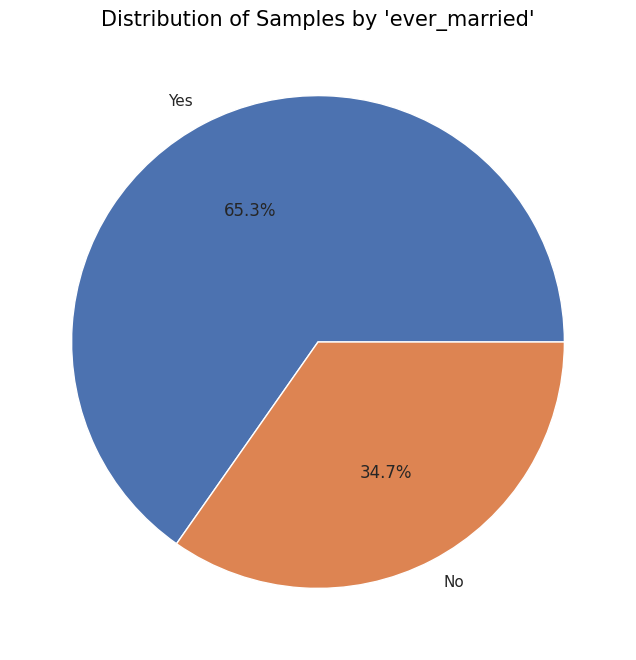

In [136]:
labels = df['ever_married'].value_counts().index
sizes = df['ever_married'].value_counts().values

plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Distribution of Samples by 'ever_married'",color = 'black',fontsize = 15)

#observation

*This* result shows that 65.3 % of people from the list are married and 34.4 % are unmarried.

In [137]:
# work type stroke

df[["work_type","stroke"]].groupby(["work_type"], as_index = False).mean().sort_values(by="stroke",ascending = False)

work_type    stroke
3  Self-employed  0.068387
2        Private  0.045180
0       Govt_job  0.044444
4       children  0.001490
1   Never_worked  0.000000

#observation


Based on this comparison we see in the provided dataset that people who never worked never got a heart attack and the people who are self employed employed got more strokes

In [138]:
# based on residence

df[["Residence_type","stroke"]].groupby(["Residence_type"], as_index = False).mean().sort_values(by="stroke",ascending = False)

Residence_type    stroke
1          Urban  0.043775
0          Rural  0.041339

#observation
Based on the analysis the people who live in Urban areas were reported with more strokes

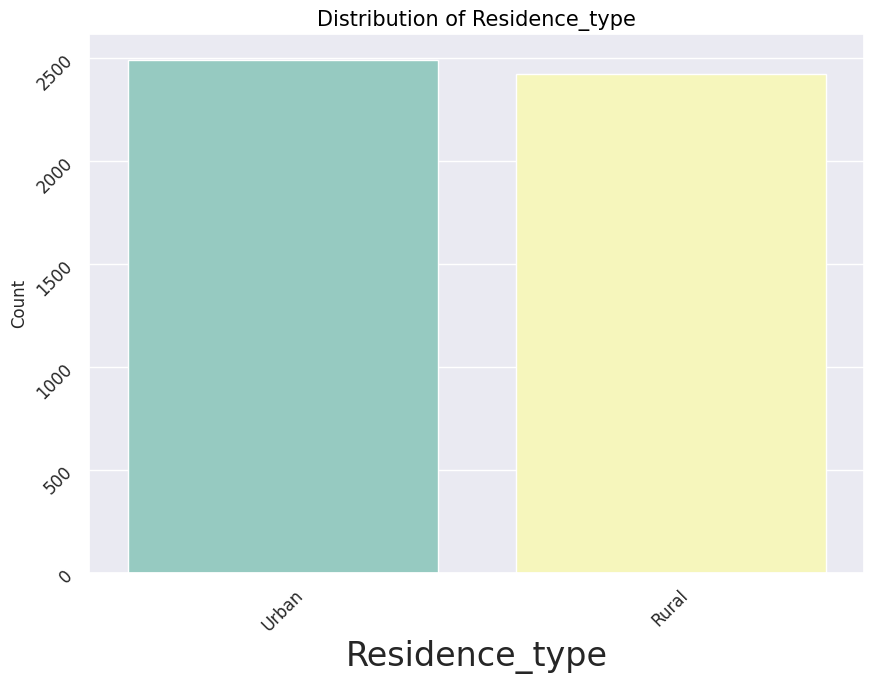

In [139]:
# visualisation of residence type


counts = df['Residence_type'].value_counts()

plt.figure(figsize=(10,7))
sns.barplot(x=counts.index, y=counts.values, palette="Set3")

plt.ylabel('Count')
plt.xlabel('Residence_type', style = 'normal', size = 24)

plt.xticks(rotation = 45, size = 12)
plt.yticks(rotation = 45, size = 12)

plt.title('Distribution of Residence_type',color = 'black',fontsize=15)
plt.show()

#observation **


Patients with stroke is almost get spread across the rural types.



In [140]:
# smoking status

df[["smoking_status","stroke"]].groupby(["smoking_status"], as_index = False).mean().sort_values(by="stroke",ascending = False)

smoking_status    stroke
1  formerly smoked  0.068100
3           smokes  0.052917
2     never smoked  0.045356
0          Unknown  0.019555

**observation**


Based on the plot we can that those who formerly smoked got more strokes The people who smoked and never smoked has a somewhat same probability of getting stroke

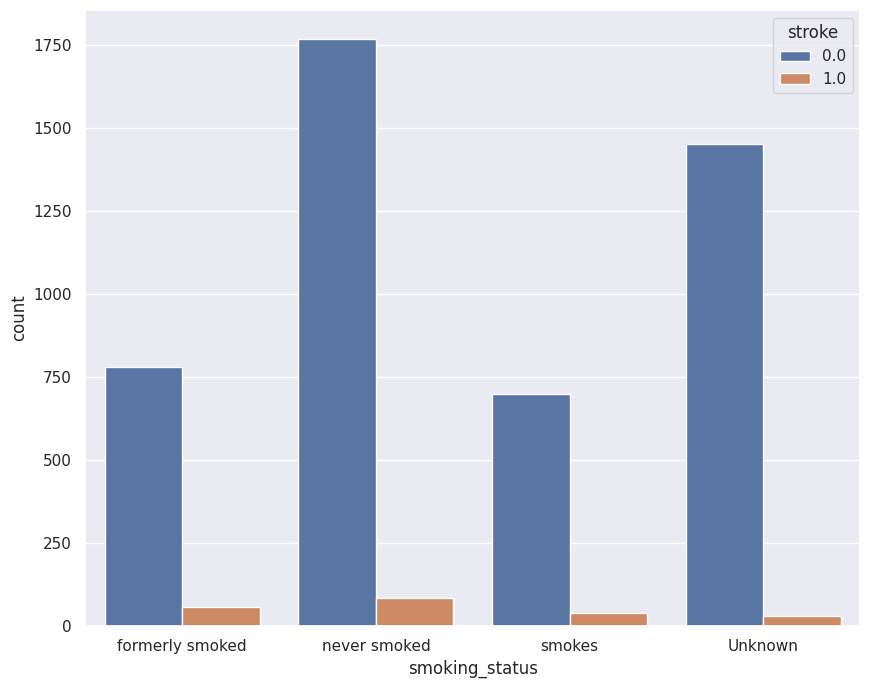

In [141]:
# visualisation of smoking status
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='smoking_status',hue='stroke')
plt.show()



#observation
* Combination of patients that formely smoked and those that smokes have stroke than those that never smoked.
* We also have lots of unknown smoking status that has stroke.

**pandas  profiling**


it is used to generate the profile reports  from a pandas dataframe (df)  with its characteristics and issues

In [142]:
# pandas profiling
import pandas_profiling as pp
pp.ProfileReport(df)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#observation

Demonstration of all the attributes

Overview of dataset statistics and data types.


Histograms and descriptive statistics for each numerical column.
Frequency tables and cardinality for categorical columns.


Correlation matrices and missing data analysis.


charts and visualizations.



** Correlation matrix between the attributes in the dataset to find if any attributes are correlated**

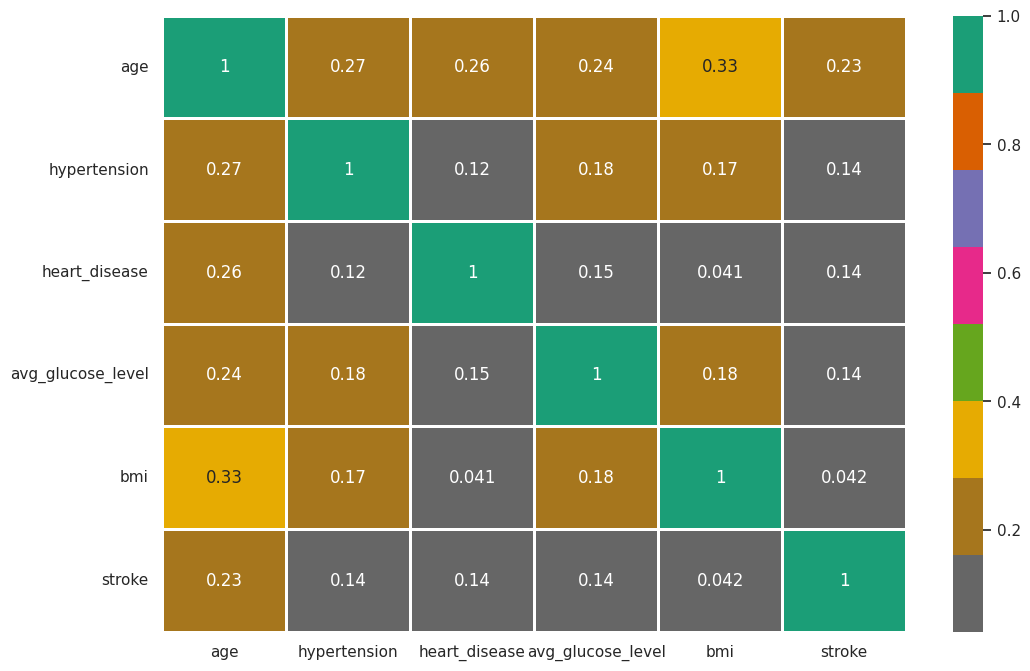

In [143]:
# # Standard correlation coefficients of features

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

**observation**

There is a poor correlation between the attributes as per the plotted heatmap

The highest correlation found was between age and bmi - 0.33


BMI is the least correlated with stroke, and age is the most correlated to stroke amongs the numerical features.



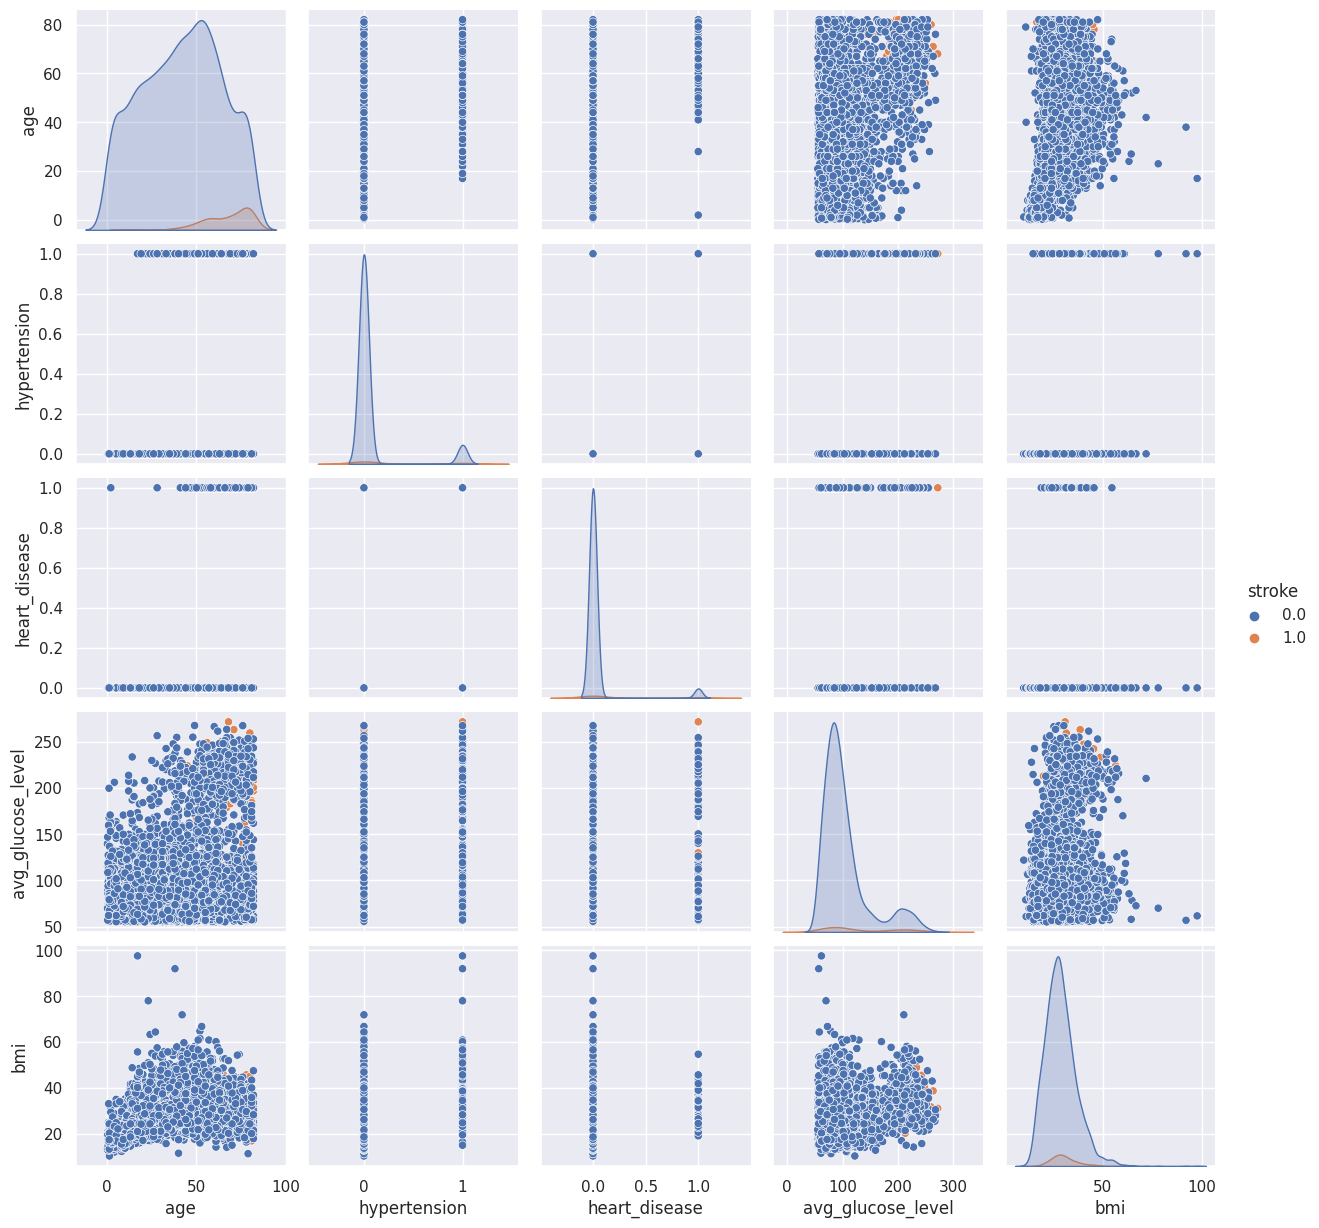

In [144]:
# Generating the following fields and indicate the correlation of each field.


sns.pairplot(df, hue = 'stroke')

   # observation
    
*    These visualizations help provide insights into the distribution of stroke cases by gender, age, and other attributes , allowing for a better understanding of the dataset related to brain strokes.*

<Axes: title={'center': 'stroke'}>

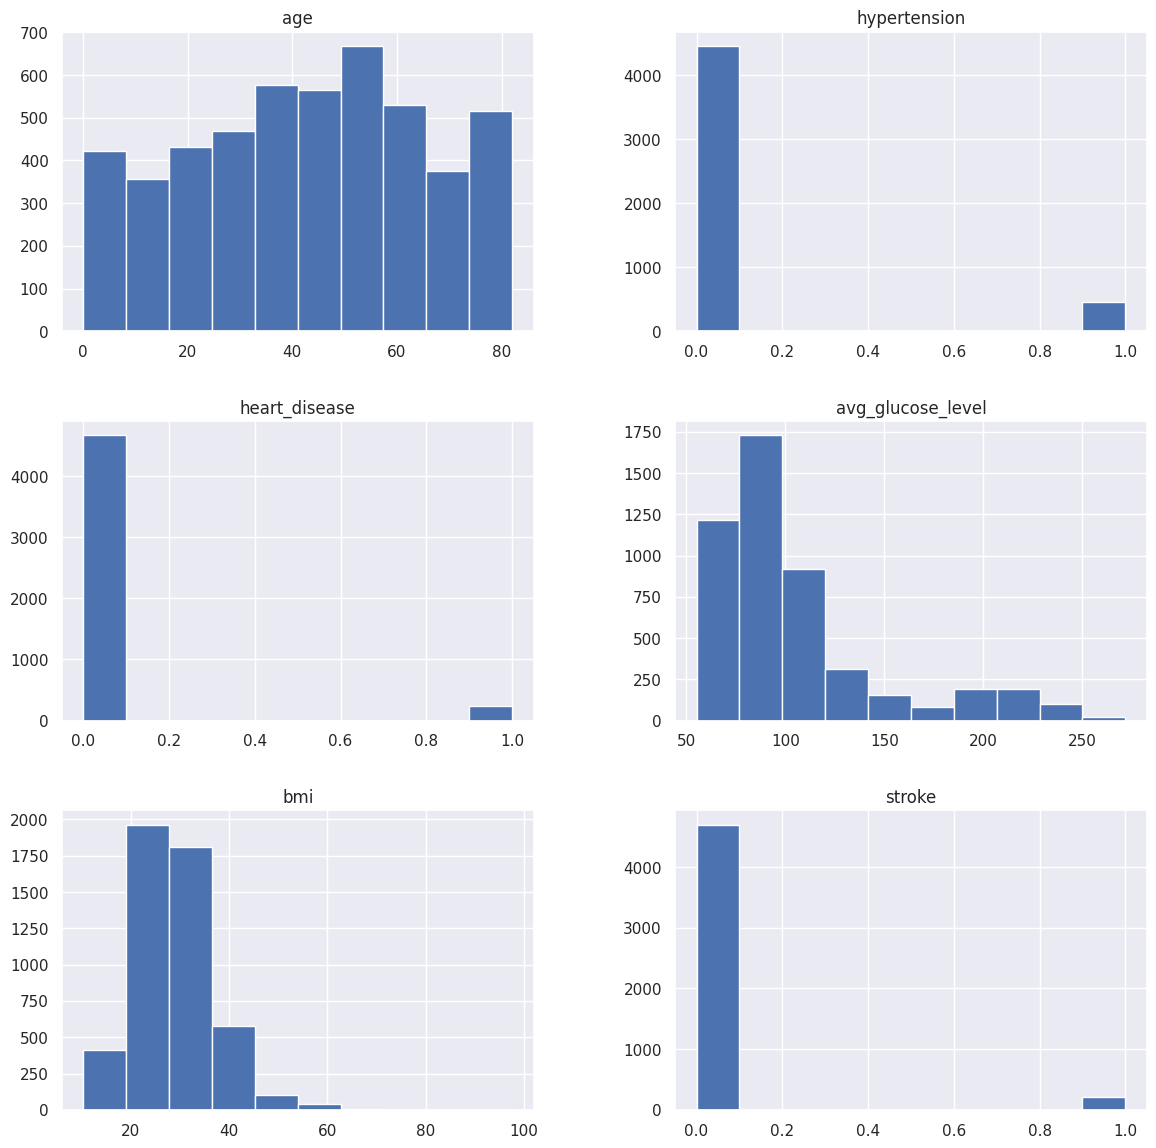

In [145]:
#Using seaborn to visualize correlations using histograms.
df.hist(figsize=(14,14))
sns.lineplot()

#observation
BMI is the least correlated with stroke, and age is the most correlated to stroke amongs the numerical features.

<Axes: >

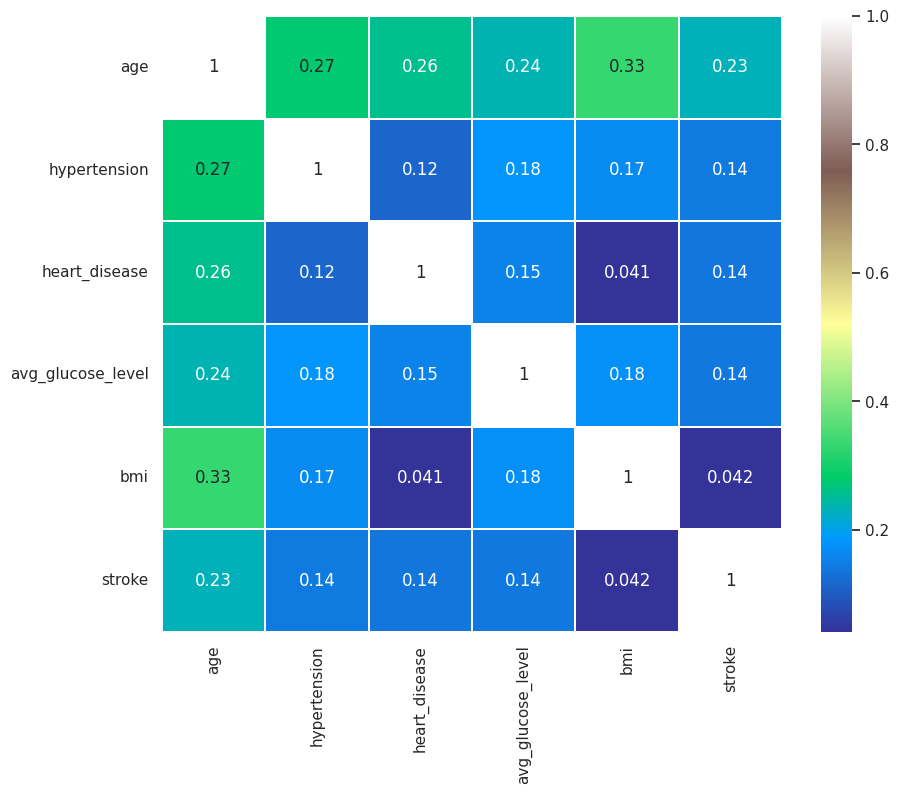

In [146]:
# creating a correlation heatmap
sns.heatmap(df.corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(10,8)
sns.lineplot()

# # Standard correlation coefficients of features after Processing
# plt.figure(figsize=(16,8))
# sns.heatmap(df.corr(),annot=True);
# plt.title("Correlation of Features after Data Processing")
# plt.show()

#observation

The columns 'bmi' and 'age' has a relatively strong relationship with each other, and the one that has the weakest relationship with 'stroke' is 'bmi'. The column with the strongest relationship with 'stroke' is 'age'

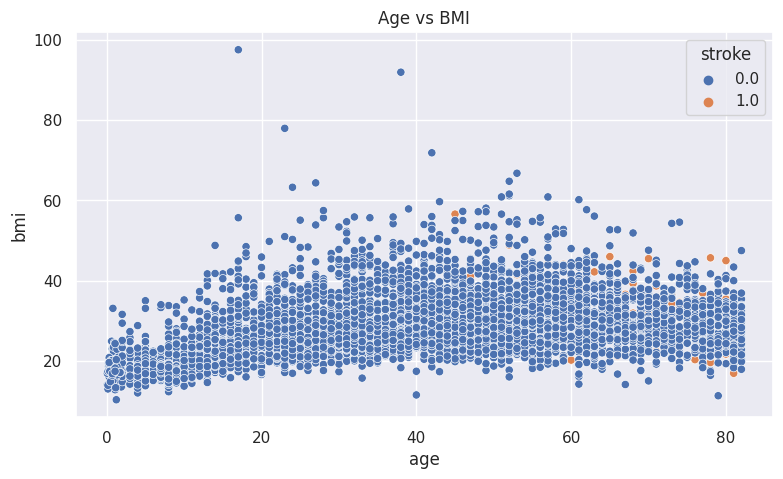

In [147]:
# Age vs BMI
fig,ax=plt.subplots(figsize=(9,5))
sns.scatterplot(data=df, x="age", y="bmi",
                hue='stroke' )
plt.title('Age vs BMI')
plt.show()

**observation**


Most of the patients have BMI under 40, and stroke occurs more in patients over 60 years old.


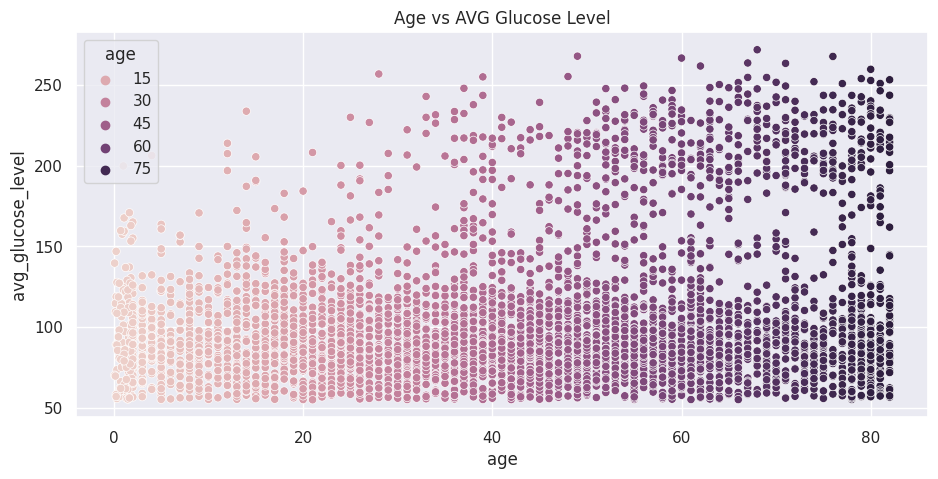

In [148]:
# Age vs Glucose Level
fig,ax=plt.subplots(figsize=(11,5))
sns.scatterplot(data=df, x="age", y="avg_glucose_level",
                hue='age')
plt.title('Age vs AVG Glucose Level')
plt.show()

**observation**

Patients with average glucose level higher than 150 and over 60 years old tends to have stroke.


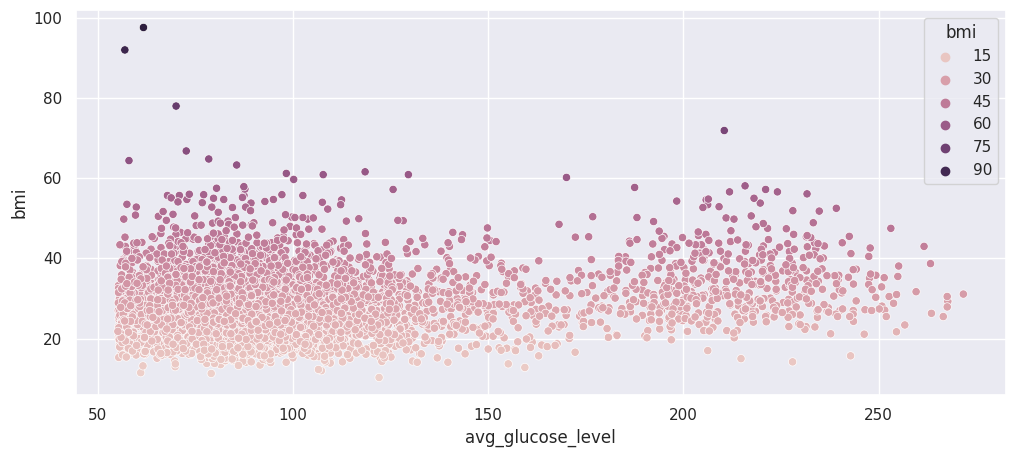

In [149]:
# BMI vs Glucose Level
fig,ax=plt.subplots(figsize=(12,5))
sns.scatterplot(data=df, y="bmi", x="avg_glucose_level",
                hue='bmi')
plt.show()

**observation**

Most people have BMI less than 60, stroke tends to happen with the ones that have average glucose level over 150.


** Data Preparation for Machine Learning**

In [150]:

# import numpy as np to for numerical and mathematical operation

import numpy as np


#  Anomaly Detection


#### Anomaly is one that differs significantly from other observations in the same sample. An anomaly detection pattern produces two different results. The first is a categorical tag for whether the observation is abnormal or not; the second is a score or trust value. Score carries more information than the label. Because it also tells us how abnormal the observation is. While labeling is more common in supervised methods, the score is more common in unsupervised and semisupervised methods.


In [151]:
def detect_outliers(df,features):
    outlier_indices = []

    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)

    return multiple_outliers

# merging the data together

In [152]:
df.loc[detect_outliers(df,['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke'])]

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
14    Female  79.0             0              1          Yes        Private   
16      Male  64.0             0              1          Yes        Private   
17      Male  75.0             1              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4952    Male  51.0             1              0          Yes  Self-employed   
6       Male  74.0             1              1          Yes        Private   
35    Female  82.0             1              1           No        Private   
143   Female  69.0             1              1           No  Self-employed   
184     Male  61.0             1              1          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0             Urban             228.69  36.6  formerly smoked     1.0  
4             Rural             174.12  24.0     never smoked     1.0  
14            Urban             214.09  28.2     never smoked     1.0  
16            Urban             191.61  37.5           smokes     1.0  
17            Urban             221.29  25.8           smokes     1.0  
...             ...                ...   ...              ...     ...  
4952          Rural             211.83  56.6     never smoked     0.0  
6             Rural              70.09  27.4     never smoked     1.0  
35            Rural              84.03  26.5  formerly smoked     1.0  
143           Urban              72.17  36.8     never smoked     1.0  
184           Urban             112.24  37.4           smokes     1.0  

[77 rows x 11 columns]

In [153]:
# drop outliers to handle the data points
df = df.drop(detect_outliers(df,['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']),axis = 0).reset_index(drop = True)

In [154]:
# importing the changed data

df



gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  80.0             0              1          Yes        Private   
1     Female  49.0             0              0          Yes        Private   
2       Male  81.0             0              0          Yes        Private   
3     Female  69.0             0              0           No        Private   
4     Female  78.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4827  Female  13.0             0              0           No       children   
4828  Female  81.0             0              0          Yes  Self-employed   
4829  Female  35.0             0              0          Yes  Self-employed   
4830    Male  51.0             0              0          Yes        Private   
4831  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0             Rural             105.92  32.5     never smoked     1.0  
1             Urban             171.23  34.4           smokes     1.0  
2             Urban             186.21  29.0  formerly smoked     1.0  
3             Urban              94.39  22.8     never smoked     1.0  
4             Urban              58.57  24.2          Unknown     1.0  
...             ...                ...   ...              ...     ...  
4827          Rural             103.08  18.6          Unknown     0.0  
4828          Urban             125.20  40.0     never smoked     0.0  
4829          Rural              82.99  30.6     never smoked     0.0  
4830          Rural             166.29  25.6  formerly smoked     0.0  
4831          Urban              85.28  26.2          Unknown     0.0  

[4832 rows x 11 columns]

#Missing value

In [155]:
# bmi missing value
df[df['bmi'].isnull()]

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []

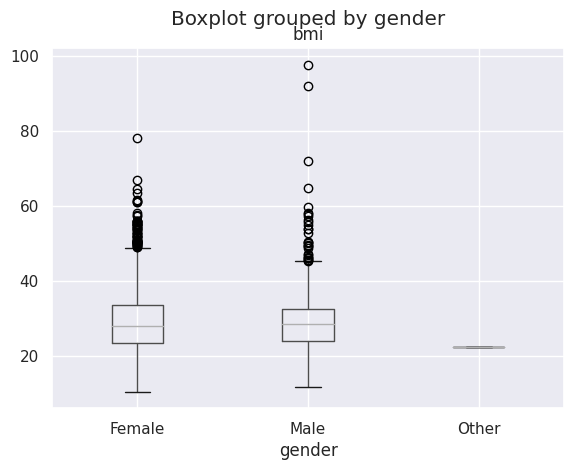

In [156]:
# showing the visualisation of bmi and gender

df.boxplot(column="bmi",by = "gender")
plt.show()

**observation**

* Most patients aren't healthy in terms of BMI.
* There are outliers in the BMI column as well.


* We have selected the differences for BMI will be between gender for null values


# Handling missing values with mean subtitution

#### We get different BMI averages for women and men, although not very large. I will assign the total BMI mean as there are very few examples for the Others gender.

In [157]:
print("Mean of BMI value for Females: ", np.mean(df[df['gender'] == 'Female']['bmi']))
print("Mean of BMI value for Males: ", np.mean(df[df['gender'] == 'Male']['bmi']))
print("Mean of BMI value for Others: ", np.mean(df['bmi']))

Mean of BMI value for Females:  28.97048951048951
Mean of BMI value for Males:  28.54556062912227
Mean of BMI value for Others:  28.795798841059607


In [158]:
# fiiled null value with 0 for training model
df['bmi'] = df['bmi'].fillna(0)

In [159]:
#testing null values in any attributes now
df[df['bmi'].isnull()]

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []

In [160]:

# check duplicated data
duplicate = df.duplicated()
df[duplicate].sum()

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

**Handling Categorical Data**

Label Encoding will be used for the ordinal features so we can preserve the order of the categories


OneHot Encoding will be used for other nominal features since there are no inherent order in the categories.

The sklearn is used for classification regression
standard scalter is used to normalize the data



In [161]:
# handling categorical value


from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
print("Unique Values for Gender", df['gender'].unique())
print("Unique Values for ever_married", df['ever_married'].unique())
print("Unique Values for work_type", df['work_type'].unique())
print("Unique Values for Residence_type", df['Residence_type'].unique())
print("Unique Values for smoking_status", df['smoking_status'].unique())

Unique Values for Gender ['Male' 'Female' 'Other']
Unique Values for ever_married ['Yes' 'No']
Unique Values for work_type ['Private' 'Govt_job' 'Self-employed' 'children' 'Never_worked']
Unique Values for Residence_type ['Rural' 'Urban']
Unique Values for smoking_status ['never smoked' 'smokes' 'formerly smoked' 'Unknown']


In [162]:
# label encoding is used for handling categorical value

ever_married_mapping = {'No': 0, 'Yes': 1}
df['ever_married'] = df['ever_married'].map(ever_married_mapping)

In [163]:
Residence_type_mapping = {'Rural': 0, 'Urban': 1}
df['Residence_type'] = df['Residence_type'].map(Residence_type_mapping)


## One-Hot Encoding

#### One Hot Encoding is the binary representation of categorical variables. This process requires categorical values to be mapped to integer values first. Next, each integer value is represented as a binary vector with all values zero except the integer index marked with 1.

#### One Hot Encoding makes the representation of categorical data more expressive and easy. Many machine learning algorithms cannot work directly with categorical data, so categories must be converted to numbers. This operation is required for input and output variables that are categorical.

###Label Encoding will be used for the ordinal features so we can preserve the order of the categories
### The Scikit-Learn library will be used to perform these operations.

#### In this part, we converted categorical datas to the binary values. This operation increases the accuracy.


In [164]:
# Importing LabelEncoder, standard scaler and OneHot Encoder

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
onehotencoder = OneHotEncoder()


# Creating dummy variables for numeric-binary attributes **

**# Converting numeric-binary value attributes to string**

In [165]:


df['gender'] = pd.Categorical(df['gender'])
datasetDummies_gender = pd.get_dummies(df['gender'], prefix = 'gender_encoded')
datasetDummies_gender

gender_encoded_Female  gender_encoded_Male  gender_encoded_Other
0                         0                    1                     0
1                         1                    0                     0
2                         0                    1                     0
3                         1                    0                     0
4                         1                    0                     0
...                     ...                  ...                   ...
4827                      1                    0                     0
4828                      1                    0                     0
4829                      1                    0                     0
4830                      0                    1                     0
4831                      1                    0                     0

[4832 rows x 3 columns]

In [166]:
df['work_type'] = pd.Categorical(df['work_type'])
datasetDummies_work_type = pd.get_dummies(df['work_type'], prefix = 'work_type_encoded')
datasetDummies_work_type

work_type_encoded_Govt_job  work_type_encoded_Never_worked  \
0                              0                               0   
1                              0                               0   
2                              0                               0   
3                              0                               0   
4                              0                               0   
...                          ...                             ...   
4827                           0                               0   
4828                           0                               0   
4829                           0                               0   
4830                           0                               0   
4831                           1                               0   

      work_type_encoded_Private  work_type_encoded_Self-employed  \
0                             1                                0   
1                             1                                0   
2                             1                                0   
3                             1                                0   
4                             1                                0   
...                         ...                              ...   
4827                          0                                0   
4828                          0                                1   
4829                          0                                1   
4830                          1                                0   
4831                          0                                0   

      work_type_encoded_children  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  
...                          ...  
4827                           1  
4828                           0  
4829                           0  
4830                           0  
4831                           0  

[4832 rows x 5 columns]

In [167]:
df['smoking_status'] = pd.Categorical(df['smoking_status'])
datasetDummies_smoking_status = pd.get_dummies(df['smoking_status'], prefix = 'smoking_status_encoded')
datasetDummies_smoking_status

smoking_status_encoded_Unknown  smoking_status_encoded_formerly smoked  \
0                                  0                                       0   
1                                  0                                       0   
2                                  0                                       1   
3                                  0                                       0   
4                                  1                                       0   
...                              ...                                     ...   
4827                               1                                       0   
4828                               0                                       0   
4829                               0                                       0   
4830                               0                                       1   
4831                               1                                       0   

      smoking_status_encoded_never smoked  smoking_status_encoded_smokes  
0                                       1                              0  
1                                       0                              1  
2                                       0                              0  
3                                       1                              0  
4                                       0                              0  
...                                   ...                            ...  
4827                                    0                              0  
4828                                    1                              0  
4829                                    1                              0  
4830                                    0                              0  
4831                                    0                              0  

[4832 rows x 4 columns]

### **Concatenate Categorical and Numerical**

In [168]:
df.drop("gender", axis=1, inplace=True)
df.drop("work_type", axis=1, inplace=True)
df.drop("smoking_status", axis=1, inplace=True)

In [169]:
df = pd.concat([df, datasetDummies_gender], axis=1)
df = pd.concat([df, datasetDummies_work_type], axis=1)
df = pd.concat([df, datasetDummies_smoking_status], axis=1)
df

age  hypertension  heart_disease  ever_married  Residence_type  \
0     80.0             0              1             1               0   
1     49.0             0              0             1               1   
2     81.0             0              0             1               1   
3     69.0             0              0             0               1   
4     78.0             0              0             1               1   
...    ...           ...            ...           ...             ...   
4827  13.0             0              0             0               0   
4828  81.0             0              0             1               1   
4829  35.0             0              0             1               0   
4830  51.0             0              0             1               0   
4831  44.0             0              0             1               1   

      avg_glucose_level   bmi  stroke  gender_encoded_Female  \
0                105.92  32.5     1.0                      0   
1                171.23  34.4     1.0                      1   
2                186.21  29.0     1.0                      0   
3                 94.39  22.8     1.0                      1   
4                 58.57  24.2     1.0                      1   
...                 ...   ...     ...                    ...   
4827             103.08  18.6     0.0                      1   
4828             125.20  40.0     0.0                      1   
4829              82.99  30.6     0.0                      1   
4830             166.29  25.6     0.0                      0   
4831              85.28  26.2     0.0                      1   

      gender_encoded_Male  gender_encoded_Other  work_type_encoded_Govt_job  \
0                       1                     0                           0   
1                       0                     0                           0   
2                       1                     0                           0   
3                       0                     0                           0   
4                       0                     0                           0   
...                   ...                   ...                         ...   
4827                    0                     0                           0   
4828                    0                     0                           0   
4829                    0                     0                           0   
4830                    1                     0                           0   
4831                    0                     0                           1   

      work_type_encoded_Never_worked  work_type_encoded_Private  \
0                                  0                          1   
1                                  0                          1   
2                                  0                          1   
3                                  0                          1   
4                                  0                          1   
...                              ...                        ...   
4827                               0                          0   
4828                               0                          0   
4829                               0                          0   
4830                               0                          1   
4831                               0                          0   

      work_type_encoded_Self-employed  work_type_encoded_children  \
0                                   0                           0   
1                                   0                           0   
2                                   0                           0   
3                                   0                           0   
4                                   0                           0   
...                               ...                         ...   
4827                                0                           1   
4828                                1                  

# Data is ready for Machine Learning

new i will train and test the model

In [170]:
# now the data is ready for machine learining
#train-test split
features = ['age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'gender_encoded_Female',
 'gender_encoded_Male',
 'gender_encoded_Other',
 'work_type_encoded_Govt_job',
 'work_type_encoded_Never_worked',
 'work_type_encoded_Private',
 'work_type_encoded_Self-employed',
 'work_type_encoded_children',
 'smoking_status_encoded_Unknown',
 'smoking_status_encoded_formerly smoked',
 'smoking_status_encoded_never smoked',
 'smoking_status_encoded_smokes']

label = ['stroke']

X = df[features]
y = df[label]

In [171]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.preprocessing import normalize

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve

from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)


print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 4832
Total # of sample in train dataset: 3865
Total # of sample in test dataset: 967


In [173]:
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [174]:
# training and scores of model

##### These are the ML algorithms that will apply to dataset. Results will contain train-validation-test scores,
#confusion matrix, statistical information and
#classification reports for each algorithm.

models = {
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
     'Neural Nets': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1),
}

modelNames = ["GaussianNB",
              'BernoulliNB',

              'RandomForestClassifier',

             'DecisionTreeClassifier',

              'GradientBoostingClassifier',

              'Neural Nets']

trainScores = []
validationScores = []
testScores = []

for m in models:
  model = models[m]
  model.fit(X_train, y_train)


  print(f'{m}')
  train_score = model.score(X_train, y_train)
  print(f'Train score of trained model: {train_score*100}')
  trainScores.append(train_score*100)

#   validation_score = model.score(X_valid, y_valid)
#   print(f'Validation score of trained model: {validation_score*100}')
#   validationScores.append(validation_score*100)

  test_score = model.score(X_test, y_test)
  print(f'Test score of trained model: {test_score*100}')
  testScores.append(test_score*100)
  print(" ")

  y_predictions = model.predict(X_test)
  conf_matrix = confusion_matrix(y_predictions, y_test)

  print(f'Confussion Matrix: \n{conf_matrix}\n')

  predictions = model.predict(X_test)
  cm = confusion_matrix(predictions, y_test)

  tn = conf_matrix[0,0]
  fp = conf_matrix[0,1]
  tp = conf_matrix[1,1]
  fn = conf_matrix[1,0]
  accuracy  = (tp + tn) / (tp + fp + tn + fn)
  precision = tp / (tp + fp)
  recall    = tp / (tp + fn)
  f1score  = 2 * precision * recall / (precision + recall)
  specificity = tn / (tn + fp)
  print(f'Accuracy : {accuracy}')
  print(f'Specificity : {specificity}')
  print("")
  print(f'Classification Report: \n{classification_report(predictions, y_test)}\n')
  print("")

  for m in range (1):
    current = modelNames[m]
    modelNames.remove(modelNames[m])

  preds = model.predict(X_test)
  confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
  print("***")
  print("")
  print("")

GaussianNB
Train score of trained model: 17.335058214747736
Test score of trained model: 19.027921406411583
 
Confussion Matrix: 
[[154   0]
 [783  30]]

Accuracy : 0.19027921406411583
Specificity : 1.0

Classification Report: 
              precision    recall  f1-score   support

         0.0       0.16      1.00      0.28       154
         1.0       1.00      0.04      0.07       813

    accuracy                           0.19       967
   macro avg       0.58      0.52      0.18       967
weighted avg       0.87      0.19      0.10       967



***


BernoulliNB
Train score of trained model: 96.14489003880983
Test score of trained model: 96.27714581178904
 
Confussion Matrix: 
[[931  30]
 [  6   0]]

Accuracy : 0.9627714581178903
Specificity : 0.9687825182101977

Classification Report: 
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       961
         1.0       0.00      0.00      0.00         6

    accuracy                    

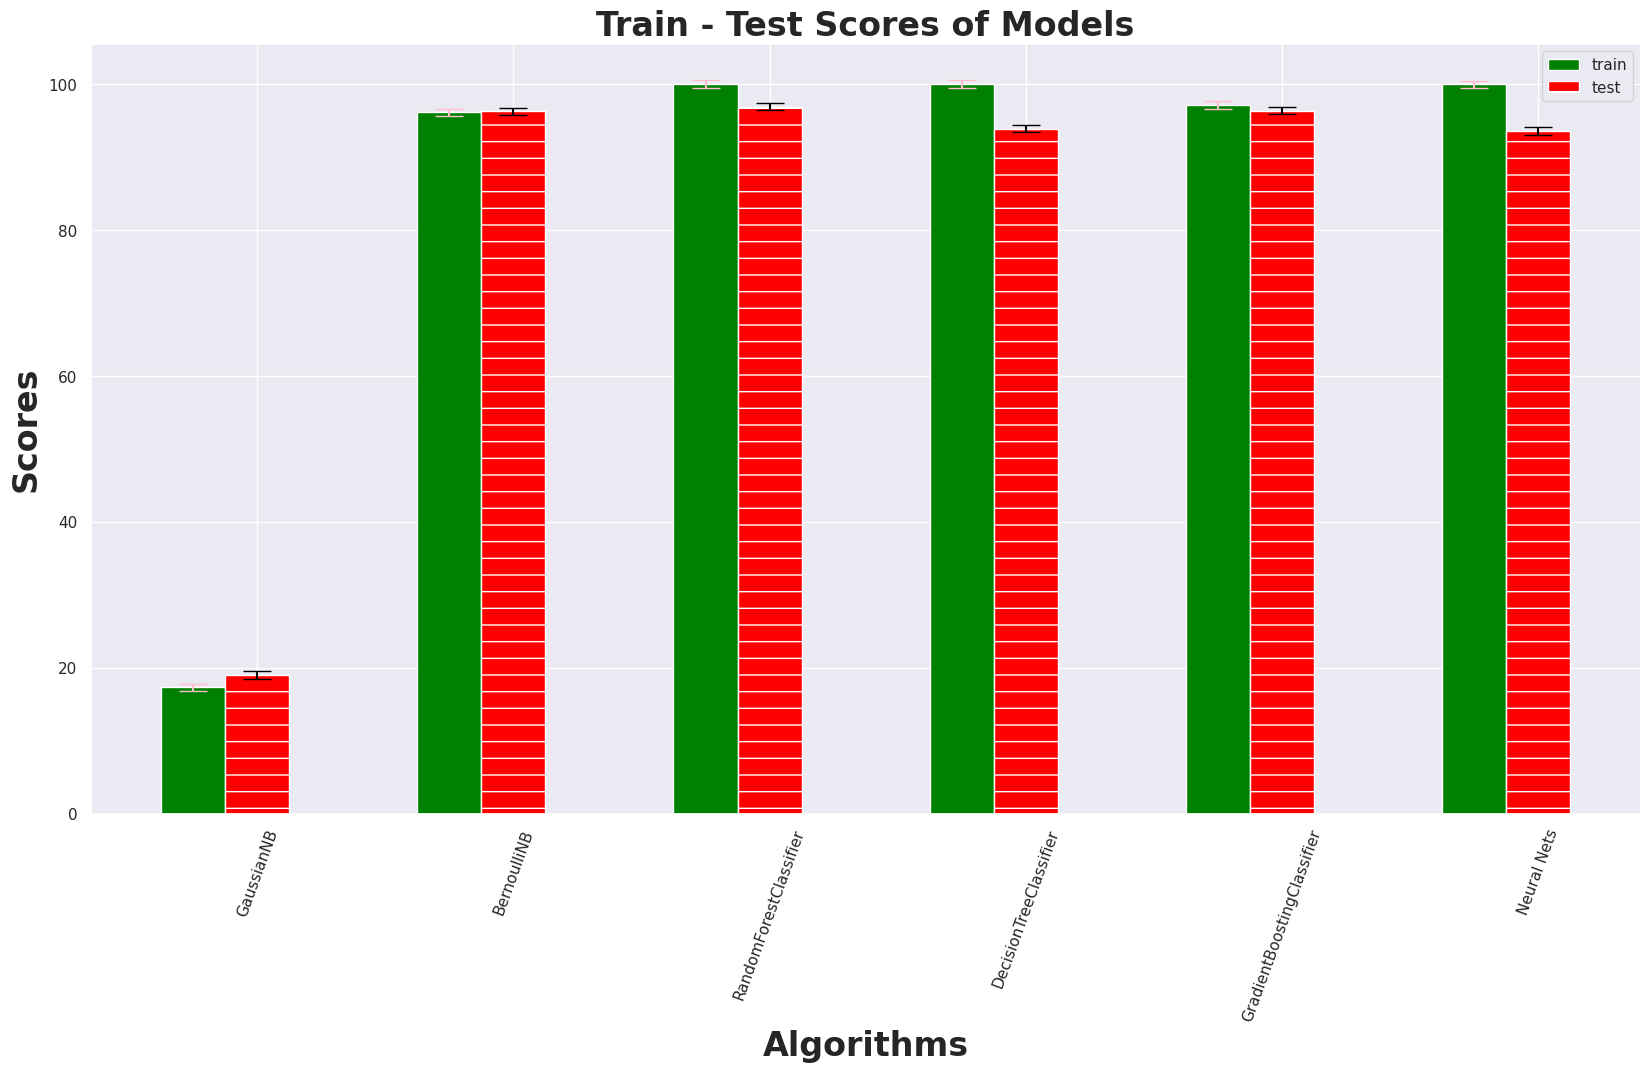

In [175]:
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.title('Train - Test Scores of Models', fontweight='bold', size = 24)

barWidth = 0.25

bars1 = trainScores
bars3 = testScores

r1 = np.arange(len(bars1))
r3 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='green', width=barWidth, edgecolor='white', label='train', yerr=0.5,ecolor="pink",capsize=10)
plt.bar(r3, bars3, color='red', width=barWidth, edgecolor='white', label='test', yerr=0.5,ecolor="black",capsize=10, hatch = '-')

modelNames = ["GaussianNB",
              'BernoulliNB',

              'RandomForestClassifier',

             'DecisionTreeClassifier',

              'GradientBoostingClassifier',

              'Neural Nets']

plt.xlabel('Algorithms', fontweight='bold', size = 24)
plt.ylabel('Scores', fontweight='bold', size = 24)
plt.xticks([r + barWidth for r in range(len(bars1))], modelNames, rotation = 70)

plt.legend()
plt.show()

In [176]:
for i in range(6):
    print(f'Accuracy of {modelNames[i]} -----> {testScores[i]}')

Accuracy of GaussianNB -----> 19.027921406411583
Accuracy of BernoulliNB -----> 96.27714581178904
Accuracy of RandomForestClassifier -----> 96.89762150982419
Accuracy of DecisionTreeClassifier -----> 93.8986556359876
Accuracy of GradientBoostingClassifier -----> 96.38055842812823
Accuracy of Neural Nets -----> 93.58841778697001


In [177]:
import random
#Evaluation of Models
#### We evaluated these models according to their accuracies. Best algorithm is random forest classifier with 96.89%. So,
#we will make k-Fold Cross Validation and Hyper-Parameter Optimization for RF algorithm.

random_model = RandomForestClassifier()
random_model.fit(X_train, y_train)

train_score = random_model.score(X_train, y_train)
print(f'Train score of trained model: {train_score}')

# validation_score = random_model.score(X_valid, y_valid)
# print(f'Validation score of trained model: {validation_score}')

test_score = random_model.score(X_test, y_test)
print(f'Test score of trained model: {test_score}')

y_predictions = random_model.predict(X_test)

conf_matrix = confusion_matrix(y_predictions, y_test)


print(f'Accuracy: {accuracy_score(y_predictions, y_test)*100}')
print()
print(f'Confussion matrix: \n{conf_matrix}\n')




Train score of trained model: 1.0
Test score of trained model: 0.9689762150982419
Accuracy: 96.89762150982419

Confussion matrix: 
[[937  30]
 [  0   0]]



In [179]:
accuracy_scores = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracy_scores.append(accuracy)
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    print(name + " Accuracy: {:.3f}%\n\t\t\t\tPrecision: {:.3f}%\n\t\t\t\t   Recall: {:.3f}%\n\t\t\t\t F1-Score: {:.3f}%\n"
    .format(accuracy, precision, recall,f1))


    #This confirms what our intuitions told us. The older you get, the more at risk you get.

#However, you may have noticed the low risk values on the y-axis. This is because the dataset is highly imbalanced.

GaussianNB Accuracy: 19.028%
				Precision: 3.690%
				   Recall: 100.000%
				 F1-Score: 7.117%

BernoulliNB Accuracy: 96.277%
				Precision: 0.000%
				   Recall: 0.000%
				 F1-Score: 0.000%

RandomForestClassifier Accuracy: 96.898%
				Precision: 0.000%
				   Recall: 0.000%
				 F1-Score: 0.000%

DecisionTreeClassifier Accuracy: 93.899%
				Precision: 0.000%
				   Recall: 0.000%
				 F1-Score: 0.000%

GradientBoostingClassifier Accuracy: 96.381%
				Precision: 0.000%
				   Recall: 0.000%
				 F1-Score: 0.000%

Neural Nets Accuracy: 93.588%
				Precision: 2.941%
				   Recall: 3.333%
				 F1-Score: 3.125%



#conclusion

Closing
Machine Learning Model to predict stroke in humans can be used because it reaches a recall score of 98.89% which is where this model can predict stroke very well although it still needs to be improved even up to a recall score of 100%.

1.Scikit-learn.org. (2023). scikit-learn: machine learning in Python — scikit-learn 1.3.1 documentation. [online] Available at: https://scikit-learn.org/stable/ [Accessed 27 Sep. 2023].

‌2. W3schools.com. (2022). Pandas Introduction. [online] Available at: https://www.w3schools.com/python/pandas/pandas_intro.asp#:~:text=Pandas%20is%20a%20Python%20library,by%20Wes%20McKinney%20in%202008. [Accessed 27 Sep. 2023].

‌